# Tarea 1
### Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

(800, 800, 1)


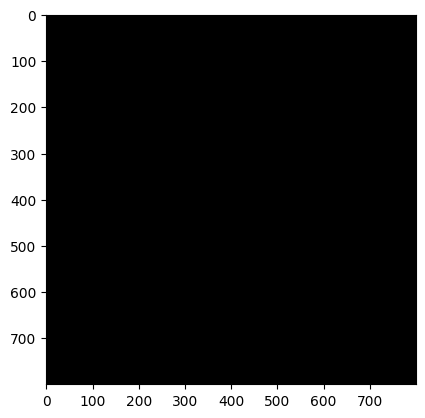

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt


ancho = 800
alto = 800


gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)

print(gris_img.shape)

plt.imshow(gris_img, cmap='gray')

plt.show()

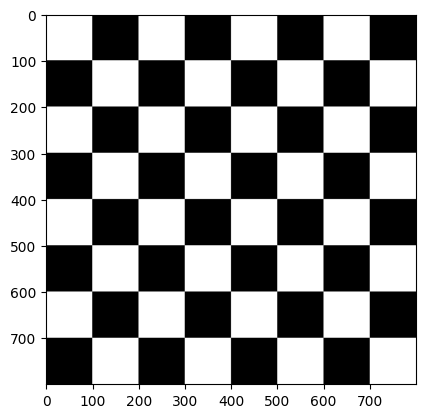

In [4]:
#Modifica un par de zonas rectangulares de la imagen
gris_img[:] = 0

#gris_img[x1:x2,y1:y2] = 255 #Especifica el canal 0

x1=0
x2=100
y1=0
y2=100

for i in range(8):
    
    for j in range(4):
        gris_img[x1:x2,y1:y2] = 255
        y1+=200
        y2+=200
    x1+=100
    x2+=100
    if i%2 == 0:
        y1=100
        y2=200
    else:
        y1=0
        y2=100


plt.imshow(gris_img, cmap='gray')
plt.show()

# Tarea 2
### Crear una imagen estilo Mondrian

Creamos la imagen de 800x800 con tres canales de color

(800, 800, 3)


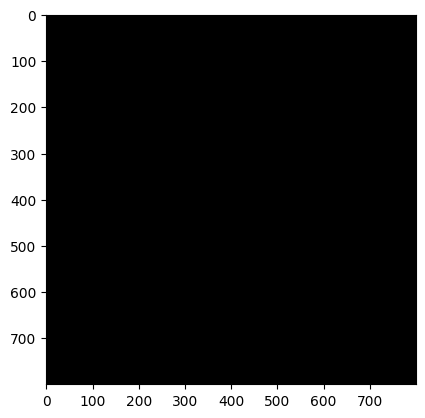

In [ ]:
mondrian=np.zeros((alto,ancho,3),dtype=np.uint8)
print(mondrian.shape)
plt.imshow(mondrian)
plt.show()

delimitamos las distintas zonas de color y las lineas negras

In [ ]:
mondrian[0:200,:,0]=255

mondrian[220:,:,0]=255
mondrian[220:,:,1]=255
mondrian[220:,:,2]=255

mondrian[220:,450:470,0]=0
mondrian[220:,450:470,1]=0
mondrian[220:,450:470,2]=0

mondrian[400:410,450:,0]=0
mondrian[400:410,450:,1]=0
mondrian[400:410,450:,2]=0

mondrian[410:,470:,0]=255
mondrian[410:,470:,1]=255
mondrian[410:,470:,2]=0

mondrian[400:,650:670,0]=0
mondrian[400:,650:670,1]=0
mondrian[400:,650:670,2]=0

mondrian[500:,0:470,0]=0
mondrian[500:,0:470,1]=0
mondrian[500:,0:470,2]=0

mondrian[520:,0:450,0]=0
mondrian[520:,0:450,1]=0
mondrian[520:,0:450,2]=255

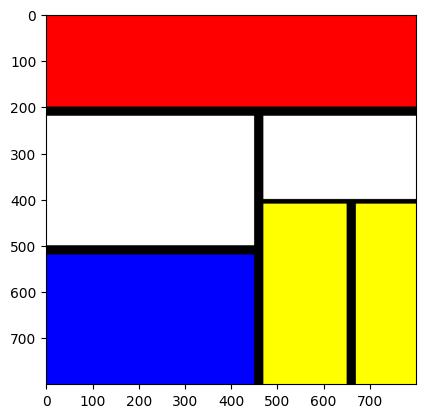

In [ ]:
plt.imshow(mondrian)
plt.show()

# Tarea 3
### Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV 

Replicamos el tablero de ajedrez pero usando funciones de dibujo, la idea es usar un bucle anidado para reccorrer las celdas en filas y en columnas, dibujando una fila por iteración.

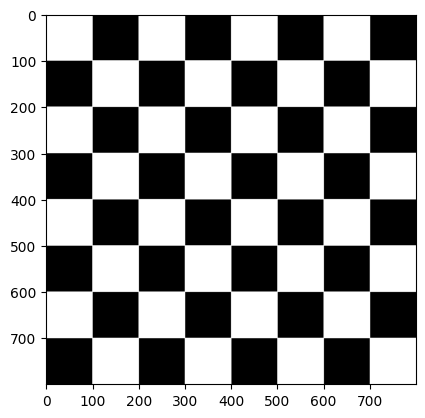

In [ ]:
ajedrezcv=np.zeros((alto,ancho,3),dtype=np.uint8)
for j in range(0,8):
    for i in range(0,8):
        if i%2==0 and j%2==0:
            cv2.rectangle(ajedrezcv,(i*100,j*100),(((i*100)+100),j*100+100),(255,255,255),-1)
        elif i%2==1 and j%2==1:
            cv2.rectangle(ajedrezcv,(i*100,j*100),(((i*100)+100),j*100+100),(255,255,255),-1)
plt.imshow(ajedrezcv)
plt.show()

# Tarea 4

### Modifica de alguna forma los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)
  
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h,w*2,3), dtype = np.uint8)
left = collage[0:h,0:w]
right = collage[0:h,w:w+w]


while(True):      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        #Dimensiones

        r = frame[:,:,0]
        v = frame[:,:,1]
        a = frame[:,:,2]

         #Jugamos
        left[:,:,0] = v
        left[:,:,1] = a
        left[:,:,2] = r 

        
        right[:,:,0] = 255 - r
        right[:,:,1] = 255 - v
        right[:,:,2] = 255 - a


        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam', collage)

    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

# Tarea 5

### Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen

Primero pasamos a escala de grises la imagen del frame para tener información que se limitia al nivel de brillo en la imágen.

La función de opencv "minMaxLoc()" nos devuelve la informacion sobre el pixel más claro y el más oscuro, sus valores y sus puntos de localizacion

Sobre estos valores de localización dibujamos los círculos

In [ ]:
cam = cv2.VideoCapture(0)
while True:
    ret,frame = cam.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        (minVal,maxVal,minLoc,maxLoc)=cv2.minMaxLoc(gray)
        cv2.circle(frame,minLoc , 10,(255,255,0),1) 
        cv2.circle(frame,maxLoc , 10,(255,0,0),1) 
        cv2.imshow('Cam',frame)
    if cv2.waitKey(20) ==27:
        break
cam.release()
cv2.destroyAllWindows()

### ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

Tenemos dos propuestas distintas. Primero, hacer una busqueda iterativa por el frame para encontrar el área de 8x8 más brillante y la más oscura:

In [ ]:
vid = cv2.VideoCapture(0)  # Puedes ajustar el número si tienes múltiples cámaras

while (True):
    # Capturar un nuevo fotograma desde la cámara
    ret, frame = vid.read()

    # Obtener las dimensiones del fotograma
    height, width, _ = frame.shape  # El tercer valor es el número de canales (generalmente 3 para RGB)

    # Inicializar variables para el pixel más claro y más oscuro
    max_loc = (0, 0)
    max_value = 0
    min_loc = (0, 0)
    min_value = 255  # Inicializamos con un valor máximo

    # Recorrer cada bloque 8x8 de píxeles en el fotograma
    block_size = 8
    for x in range(0, width - block_size, block_size):
        for y in range(0, height - block_size, block_size):
            # Calcular el valor promedio del bloque
            block = frame[y:y+block_size, x:x+block_size]
            val = np.mean(block)

            # Actualizar el valor y posición del pixel más claro
            if val > max_value:
                max_value = val
                max_loc = (x, y)

                 # Actualizar el valor y posición del pixel más oscuro
            if val < min_value:
                min_value = val
                min_loc = (x, y)

    # Dibujar círculos en las zonas 8x8 más claras y oscuras
    cv2.circle(frame, max_loc, 4, (0, 0, 255), -1)  # Rojo para el más claro
    cv2.circle(frame, min_loc, 4, (255, 0, 0), -1)  # Azul para el más oscuro

    # Mostrar el fotograma con los círculos dibujados
    cv2.imshow("Video Feed", frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(20) == 27:
        break

# Liberar la cámara y cerrar la ventana de visualización
vid.release()
cv2.destroyAllWindows()

Y por otro lado, realizar un desenfonque 8x8 de la imágen en escala de grises sobre la que se have la búsqueda, siendo el desenfoque el encargado de mediar el valor de los pixeles con los 8 pixeles alrededor 

In [ ]:
cam = cv2.VideoCapture(0)
while True:
    ret,frame = cam.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.blur(gray,(8,8))
        (minVal,maxVal,minLoc,maxLoc)=cv2.minMaxLoc(gray)
        cv2.circle(frame,minLoc , 10,(255,255,0),1) 
        cv2.circle(frame,maxLoc , 10,(255,0,0),1) 
        cv2.imshow('Cam',frame)
    if cv2.waitKey(20) ==27:
        break
cam.release()
cv2.destroyAllWindows()

# Tarea 6
### Haz tu propuesta pop art

In [ ]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
leftu = collage[0:h,0:w]
rightu = collage[0:h,w:w+w]
leftb = collage[h:h+h,0:w]
rightb = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
    
        r = frame[:,:,0]
        v = frame[:,:,1]
        a = frame[:,:,2]

         #Jugamos
        leftu[:,:,0] = a
        leftu[:,:,1] = 125 - v
        leftu[:,:,2] = r

        rightu[:,:,0] = 80 - r
        rightu[:,:,1] = v
        rightu[:,:,2] = r

        leftb[:,:,0] = 125 - r
        leftb[:,:,1] = a
        leftb[:,:,2] = v
    
        rightb[:,:,0] = a
        rightb[:,:,1] = r
        rightb[:,:,2] = 125 - v



        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
        